In [1]:
import argparse
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
import torch.utils.data as data
from utils import *
from models import *
import matplotlib.pyplot as plt
import pickle
import sys
import random

## Resnet Lambda 2D Results

In [223]:
with open('./results/resnet20_sgd_mu_150.pck','rb') as f:
    res = pickle.load(f)
with open('./results/resnet20_sgd_mu_l2.pck','rb') as f:
    res_l2 = pickle.load(f)

with open('./results/resnet20_sgd_mu_tv_p01.pck','rb') as f:
    res1 = pickle.load(f)
with open('./results/resnet20_sgd_mu_tv_p025.pck','rb') as f:
    res2 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_lambda_p05.pck','rb') as f:
    res3 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_lambda_p01_l2.pck','rb') as f:
    res4 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_lambda_p025_l2.pck','rb') as f:
    res5 = pickle.load(f)
with open('./results/resnet20_sgd_mu_tv_p05_l2.pck','rb') as f:
    res6 = pickle.load(f)

    
with open('./results/resnet20_sgd_mu_tv_150_lambda_p1.pck','rb') as f:
    res7 = pickle.load(f)
with open('./results/resnet20_sgd_mu_tv_p1_l2.pck','rb') as f:
    res8 = pickle.load(f)
with open('./results/resnet20_sgd_mu_tv_150_lambda_p5.pck','rb') as f:
    res9 = pickle.load(f)
with open('./results/resnet20_sgd_mu_tv_p05_l2_delay_75.pck','rb') as f:
    res10 = pickle.load(f)
with open('./results/resnet20_sgd_mu_tv_150_lambda_5.pck','rb') as f:
    res11 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_lambda_p001.pck','rb') as f:
    res12 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_lambda_p001_l2.pck','rb') as f:
    res13 = pickle.load(f)


    


In [210]:
res13['args']

Namespace(data_dir='./data', epochs=150, eval_bs=256, grad_logger=False, l1=False, l2=True, lambda_TV=0.001, lambda_mask=None, lambda_reg=0.0001, load_model_init='./init_models/resnet20_sgd_mu_150.state', log_file='./results/2d/resnet20_sgd_mu_tv_lambda_p001_l2.pck', lr=0.1, lr_schedule=[75, 120], mask=[0, 1, 2, 3], model='resnet20', model_file='./trained_models/2d/resnet20_sgd_mu_tv_lambda_p001_l2.pt', no_log=False, no_tv=False, optim='SGD', save_model_init='./default.pt', seed=0, train_bs=128, tv=True, tv3d=False, tv4d=False, tv_lambda_schedule=None, tv_schedule=0, weights=False)

In [226]:
res.keys()

dict_keys(['layer_TVs', 'val_accs', 'val_losses', 'losses', 'TVs', 'args'])

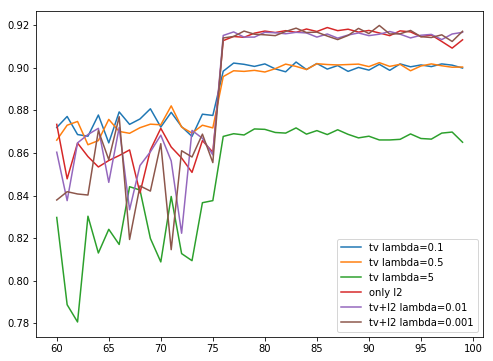

In [246]:
plt.figure(num=None, figsize=(8, 6))
start = 60
end = 100
value = 'val_accs'
# plt.plot([i for i in range(start,end)], res[value][start:end],label='no tv')
# plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv lambda=0.01')
# plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv lambda=0.025')
# plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv lambda=0.05')
plt.plot([i for i in range(start,end)], res7[value][start:end],label='tv lambda=0.1')
plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv lambda=0.5')

# plt.plot([i for i in range(start,end)], res12[value][start:end],label='tv lambda=0.001')

plt.plot([i for i in range(start,end)], res11[value][start:end],label='tv lambda=5')
plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='only l2')
plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv+l2 lambda=0.01')
# plt.plot([i for i in range(start,end)], res5[value][start:end],label='tv+l2 lambda=0.025')
# plt.plot([i for i in range(start,end)], res6[value][start:end],label='tv+l2 lambda=0.05')
# plt.plot([i for i in range(start,end)], res8[value][start:end],label='tv+l2 lambda=0.1')
# plt.plot([i for i in range(start,end)], res10[value][start:end],label='tv+l2 DELAY lambda=0.05')

plt.plot([i for i in range(start,end)], res13[value][start:end],label='tv+l2 lambda=0.001')
plt.legend()
plt.show()

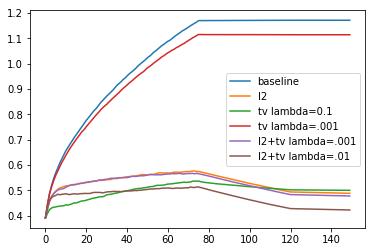

In [236]:
plt.plot(range(150), res['TVs'], label='baseline')
plt.plot(range(150), res_l2['TVs'], label='l2')
# plt.plot(range(150), res1['TVs'], label='tv lambda=0.01')
# plt.plot(range(150), res2['TVs'], label='tv lambda=0.025')
# plt.plot(range(150), res3['TVs'], label='tv lambda=0.05')
plt.plot(range(150), res7['TVs'], label='tv lambda=0.1')
# plt.plot(range(150), res9['TVs'], label='tv lambda=0.5')

# plt.plot(range(150), res11['TVs'], label='tv lambda=5')
# plt.plot(range(150), res10['TVs'], label='tv l2 delay lambda=0.05')

plt.plot(range(150), res12['TVs'], label='tv lambda=.001')
plt.plot(range(150), res13['TVs'], label='l2+tv lambda=.001')

plt.plot(range(150), res4['TVs'], label='l2+tv lambda=.01')

plt.legend()

## Resnet Lambda 3D Results

In [169]:
with open('./results/resnet20_sgd_mu_150.pck','rb') as f:
    res = pickle.load(f)
with open('./results/resnet20_sgd_mu_l2.pck','rb') as f:
    res_l2 = pickle.load(f)

with open('./results/3d/resnet20_sgd_mu_tv_p01.pck','rb') as f:
    res1 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_p025.pck','rb') as f:
    res2 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_lambda_p05.pck','rb') as f:
    res3 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_lambda_p01_l2.pck','rb') as f:
    res4 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_lambda_p025_l2.pck','rb') as f:
    res5 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_p05_l2.pck','rb') as f:
    res6 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_p1_l2.pck','rb') as f:
    res7 = pickle.load(f)
    
    


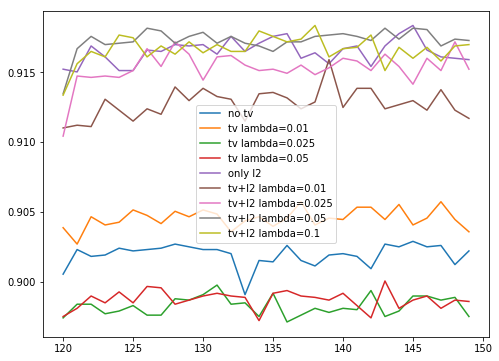

In [146]:
plt.figure(num=None, figsize=(8, 6))
start = 120
end = 150
value = 'val_accs'
plt.plot([i for i in range(start,end)], res[value][start:end],label='no tv')
plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv lambda=0.01')
plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv lambda=0.025')
plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv lambda=0.05')
plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='only l2')
plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv+l2 lambda=0.01')
plt.plot([i for i in range(start,end)], res5[value][start:end],label='tv+l2 lambda=0.025')
plt.plot([i for i in range(start,end)], res6[value][start:end],label='tv+l2 lambda=0.05')
plt.plot([i for i in range(start,end)], res7[value][start:end],label='tv+l2 lambda=0.1')
plt.legend()
plt.show()

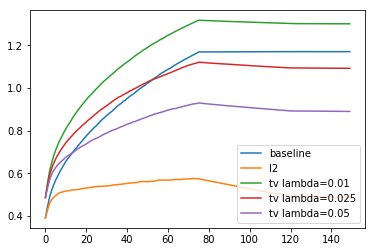

In [170]:
plt.plot(range(150), res['TVs'], label='baseline')
plt.plot(range(150), res_l2['TVs'], label='l2')
plt.plot(range(150), res1['TVs'], label='tv lambda=0.01')
plt.plot(range(150), res2['TVs'], label='tv lambda=0.025')
plt.plot(range(150), res3['TVs'], label='tv lambda=0.05')
# plt.plot(range(150), res7['TVs'], label='tv lambda=0.1')
# plt.plot(range(150), res9['TVs'], label='tv lambda=0.5')
# plt.plot(range(150), res10['TVs'], label='tv l2 delay lambda=0.05')
plt.legend()

## Resnet Lambda 4D Results

In [206]:
with open('./results/resnet20_sgd_mu_150.pck','rb') as f:
    res = pickle.load(f)
with open('./results/resnet20_sgd_mu_l2.pck','rb') as f:
    res_l2 = pickle.load(f)

with open('./results/4d/resnet20_sgd_mu_tv_p01.pck','rb') as f:
    res1 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_p025.pck','rb') as f:
    res2 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_lambda_p05.pck','rb') as f:
    res3 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_lambda_p01_l2.pck','rb') as f:
    res4 = pickle.load(f)
# with open('./results/3d/resnet20_sgd_mu_tv_lambda_p025_l2.pck','rb') as f:
#     res5 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_p05_l2.pck','rb') as f:
    res6 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_p1_l2.pck','rb') as f:
    res7 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_lambda_p1.pck','rb') as f:
    res8 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_lambda_p1_l2.pck','rb') as f:
    res9 = pickle.load(f)

    


In [207]:
res9['args']

Namespace(data_dir='./data', epochs=150, eval_bs=256, grad_logger=False, l1=False, l2=True, lambda_TV=0.1, lambda_mask=None, lambda_reg=0.0001, load_model_init='./init_models/resnet20_sgd_mu_150.state', log_file='./results/4d/resnet20_sgd_mu_tv_lambda_p1_l2.pck', lr=0.1, lr_schedule=[75, 120], mask=[0, 1, 2, 3], model='resnet20', model_file='./trained_models/4d/resnet20_sgd_mu_tv_lambda_p1_l2.pt', no_log=False, no_tv=False, optim='SGD', save_model_init='./default.pt', seed=0, train_bs=128, tv=False, tv3d=False, tv4d=True, tv_lambda_schedule=None, tv_schedule=0, weights=False)

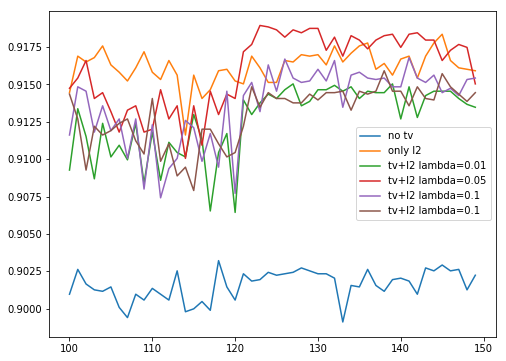

In [208]:
plt.figure(num=None, figsize=(8, 6))
start = 100
end = 150
value = 'val_accs'
plt.plot([i for i in range(start,end)], res[value][start:end],label='no tv')
# plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv lambda=0.01')
# plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv lambda=0.025')
# plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv lambda=0.05')
plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='only l2')
plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv+l2 lambda=0.01')
# plt.plot([i for i in range(start,end)], res5[value][start:end],label='tv+l2 lambda=0.025')
plt.plot([i for i in range(start,end)], res6[value][start:end],label='tv+l2 lambda=0.05')

plt.plot([i for i in range(start,end)], res7[value][start:end],label='tv+l2 lambda=0.1')

plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv+l2 lambda=0.1')
plt.legend()
plt.show()

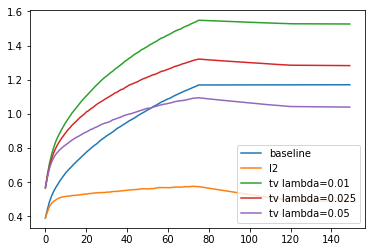

In [172]:
plt.plot(range(150), res['TVs'], label='baseline')
plt.plot(range(150), res_l2['TVs'], label='l2')
plt.plot(range(150), res1['TVs'], label='tv lambda=0.01')
plt.plot(range(150), res2['TVs'], label='tv lambda=0.025')
plt.plot(range(150), res3['TVs'], label='tv lambda=0.05')
# plt.plot(range(150), res7['TVs'], label='tv lambda=0.1')
# plt.plot(range(150), res9['TVs'], label='tv lambda=0.5')
# plt.plot(range(150), res10['TVs'], label='tv l2 delay lambda=0.05')
plt.legend()

## 2D Individual Layers

In [291]:
with open('./results/resnet20_sgd_mu_150.pck','rb') as f:
    res = pickle.load(f)
with open('./results/resnet20_sgd_mu_l2.pck','rb') as f:
    res_l2 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_initialMask.pck','rb') as f:
    res1 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_firstMask.pck','rb') as f:
    res2 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_secondMask.pck','rb') as f:
    res3 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_thirdMask.pck','rb') as f:
    res4 = pickle.load(f)
    
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_l2_initialMask.pck','rb') as f:
    res5 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_l2_firstMask.pck','rb') as f:
    res6 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_l2_secondMask.pck','rb') as f:
    res7 = pickle.load(f)
with open('./results/2d/resnet20_sgd_mu_tv_150_lambda_p01_l2_thirdMask.pck','rb') as f:
    res8 = pickle.load(f)

with open('./results/resnet20_sgd_mu_tv_p01.pck','rb') as f:
    res9 = pickle.load(f)     
with open('./results/2d/resnet20_sgd_mu_tv_lambda_p01_l2.pck','rb') as f:
    res10 = pickle.load(f)
    


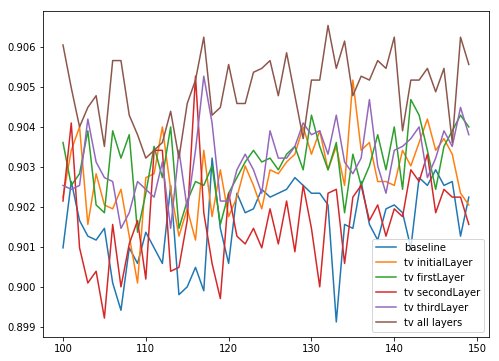

In [292]:
plt.figure(num=None, figsize=(8, 6))
start = 100
end = 150
value = 'val_accs'
plt.plot([i for i in range(start,end)], res[value][start:end],label='baseline')
# plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='l2')
plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv initialLayer')
plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv firstLayer')
plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv secondLayer')
plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv thirdLayer')
plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv all layers')

# plt.plot([i for i in range(start,end)], res5[value][start:end],label='l2+tv initialLayer')
# plt.plot([i for i in range(start,end)], res6[value][start:end],label='l2+tv firstLayer')
# plt.plot([i for i in range(start,end)], res7[value][start:end],label='l2+tv secondLayer')
# plt.plot([i for i in range(start,end)], res8[value][start:end],label='l2+tv thirdLayer')
# plt.plot([i for i in range(start,end)], res10[value][start:end],label='l2+tv all layers')
plt.legend()
plt.show()

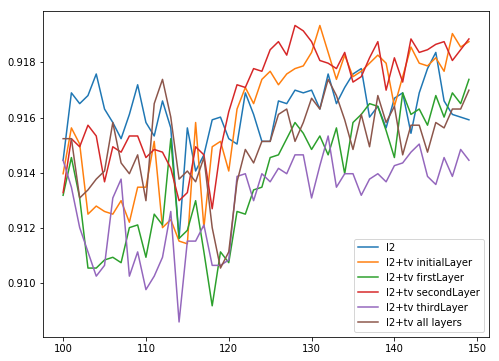

In [293]:
plt.figure(num=None, figsize=(8, 6))
start = 100
end = 150
value = 'val_accs'
# plt.plot([i for i in range(start,end)], res[value][start:end],label='baseline')
plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='l2')
# plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv initialLayer')
# plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv firstLayer')
# plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv secondLayer')
# plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv thirdLayer')
# plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv all layers')

plt.plot([i for i in range(start,end)], res5[value][start:end],label='l2+tv initialLayer')
plt.plot([i for i in range(start,end)], res6[value][start:end],label='l2+tv firstLayer')
plt.plot([i for i in range(start,end)], res7[value][start:end],label='l2+tv secondLayer')
plt.plot([i for i in range(start,end)], res8[value][start:end],label='l2+tv thirdLayer')
plt.plot([i for i in range(start,end)], res10[value][start:end],label='l2+tv all layers')
plt.legend()
plt.show()

## 3D Individual Layers

In [295]:
with open('./results/resnet20_sgd_mu_150.pck','rb') as f:
    res = pickle.load(f)
with open('./results/resnet20_sgd_mu_l2.pck','rb') as f:
    res_l2 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p01_initialMask.pck','rb') as f:
    res1 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p01_firstMask.pck','rb') as f:
    res2 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p01_secondMask.pck','rb') as f:
    res3 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p01_thirdMask.pck','rb') as f:
    res4 = pickle.load(f)
    
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p05_l2_initialMask.pck','rb') as f:
    res5 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p05_l2_firstMask.pck','rb') as f:
    res6 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p05_l2_secondMask.pck','rb') as f:
    res7 = pickle.load(f)
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p05_l2_thirdMask.pck','rb') as f:
    res8 = pickle.load(f)
    
with open('./results/3d/resnet20_sgd_mu_tv_150_lambda_p01.pck','rb') as f:
    res9 = pickle.load(f)     
with open('./results/3d/resnet20_sgd_mu_tv_p05_l2.pck','rb') as f:
    res10 = pickle.load(f)    


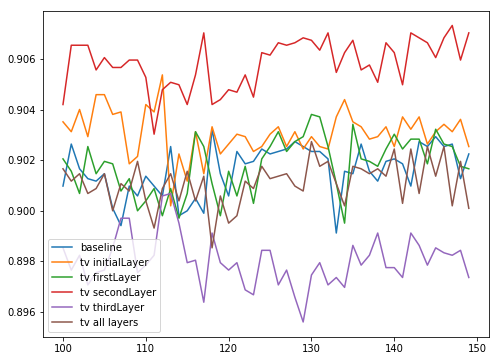

In [296]:
plt.figure(num=None, figsize=(8, 6))
start = 100
end = 150
value = 'val_accs'
plt.plot([i for i in range(start,end)], res[value][start:end],label='baseline')
# plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='l2')
plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv initialLayer')
plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv firstLayer')
plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv secondLayer')
plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv thirdLayer')
plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv all layers')

# plt.plot([i for i in range(start,end)], res5[value][start:end],label='l2+tv initialLayer')
# plt.plot([i for i in range(start,end)], res6[value][start:end],label='l2+tv firstLayer')
# plt.plot([i for i in range(start,end)], res7[value][start:end],label='l2+tv secondLayer')
# plt.plot([i for i in range(start,end)], res8[value][start:end],label='l2+tv thirdLayer')
# plt.plot([i for i in range(start,end)], res10[value][start:end],label='l2+tv all layers')
plt.legend()
plt.show()

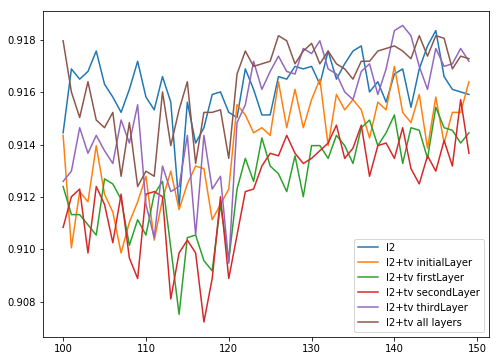

In [285]:
plt.figure(num=None, figsize=(8, 6))
start = 100
end = 150
value = 'val_accs'
# plt.plot([i for i in range(start,end)], res[value][start:end],label='baseline')
plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='l2')
# plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv initialLayer')
# plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv firstLayer')
# plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv secondLayer')
# plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv thirdLayer')
# plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv all layers')

plt.plot([i for i in range(start,end)], res5[value][start:end],label='l2+tv initialLayer')
plt.plot([i for i in range(start,end)], res6[value][start:end],label='l2+tv firstLayer')
plt.plot([i for i in range(start,end)], res7[value][start:end],label='l2+tv secondLayer')
plt.plot([i for i in range(start,end)], res8[value][start:end],label='l2+tv thirdLayer')
plt.plot([i for i in range(start,end)], res10[value][start:end],label='l2+tv all layers')
plt.legend()
plt.show()

## 4D layers

In [287]:
with open('./results/resnet20_sgd_mu_150.pck','rb') as f:
    res = pickle.load(f)
with open('./results/resnet20_sgd_mu_l2.pck','rb') as f:
    res_l2 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p01_initialMask.pck','rb') as f:
    res1 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p01_firstMask.pck','rb') as f:
    res2 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p01_secondMask.pck','rb') as f:
    res3 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p01_thirdMask.pck','rb') as f:
    res4 = pickle.load(f)
    
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p05_l2_initialMask.pck','rb') as f:
    res5 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p05_l2_firstMask.pck','rb') as f:
    res6 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p05_l2_secondMask.pck','rb') as f:
    res7 = pickle.load(f)
with open('./results/4d/resnet20_sgd_mu_tv_150_lambda_p05_l2_thirdMask.pck','rb') as f:
    res8 = pickle.load(f)
    
with open('./results/4d/resnet20_sgd_mu_tv_p01.pck','rb') as f:
    res9 = pickle.load(f)     
with open('./results/4d/resnet20_sgd_mu_tv_p05_l2.pck','rb') as f:
    res10 = pickle.load(f)    


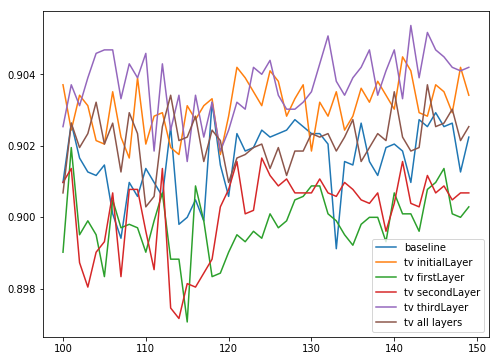

In [288]:
plt.figure(num=None, figsize=(8, 6))
start = 100
end = 150
value = 'val_accs'
plt.plot([i for i in range(start,end)], res[value][start:end],label='baseline')
# plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='l2')
plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv initialLayer')
plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv firstLayer')
plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv secondLayer')
plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv thirdLayer')
plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv all layers')

# plt.plot([i for i in range(start,end)], res5[value][start:end],label='l2+tv initialLayer')
# plt.plot([i for i in range(start,end)], res6[value][start:end],label='l2+tv firstLayer')
# plt.plot([i for i in range(start,end)], res7[value][start:end],label='l2+tv secondLayer')
# plt.plot([i for i in range(start,end)], res8[value][start:end],label='l2+tv thirdLayer')
# plt.plot([i for i in range(start,end)], res10[value][start:end],label='l2+tv all layers')
plt.legend()
plt.show()

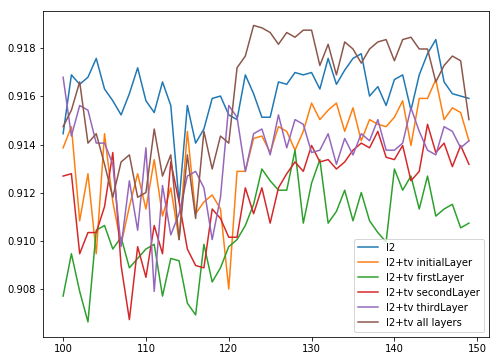

In [289]:
plt.figure(num=None, figsize=(8, 6))
start = 100
end = 150
value = 'val_accs'
# plt.plot([i for i in range(start,end)], res[value][start:end],label='baseline')
plt.plot([i for i in range(start,end)], res_l2[value][start:end],label='l2')
# plt.plot([i for i in range(start,end)], res1[value][start:end],label='tv initialLayer')
# plt.plot([i for i in range(start,end)], res2[value][start:end],label='tv firstLayer')
# plt.plot([i for i in range(start,end)], res3[value][start:end],label='tv secondLayer')
# plt.plot([i for i in range(start,end)], res4[value][start:end],label='tv thirdLayer')
# plt.plot([i for i in range(start,end)], res9[value][start:end],label='tv all layers')

plt.plot([i for i in range(start,end)], res5[value][start:end],label='l2+tv initialLayer')
plt.plot([i for i in range(start,end)], res6[value][start:end],label='l2+tv firstLayer')
plt.plot([i for i in range(start,end)], res7[value][start:end],label='l2+tv secondLayer')
plt.plot([i for i in range(start,end)], res8[value][start:end],label='l2+tv thirdLayer')
plt.plot([i for i in range(start,end)], res10[value][start:end],label='l2+tv all layers')
plt.legend()
plt.show()

### Observations

- When using L2 + TV, it does not help doing individual layers for TV3D and TV4D as much as just applying to every layer

- With L2+TV2D initial/first/second most gains, however only TV2D on all layers seemed better

- When only using TV, TV3D on second/initial layers most gains, TV4D on third/initial layers


I want to try using lambda_TV=.01 on individual layers with l2 to have more comparisons. Should take ~4*1.5 hours (i.e. we can run this at 5 and it should be done around midnight!)